# ME460 Linkages - Prof. Mark Ganter
# 4 position path generator via dyad-standard and characteristic equations
# with circle-point & center point curves

indexR= 37


<IPython.core.display.Javascript object>


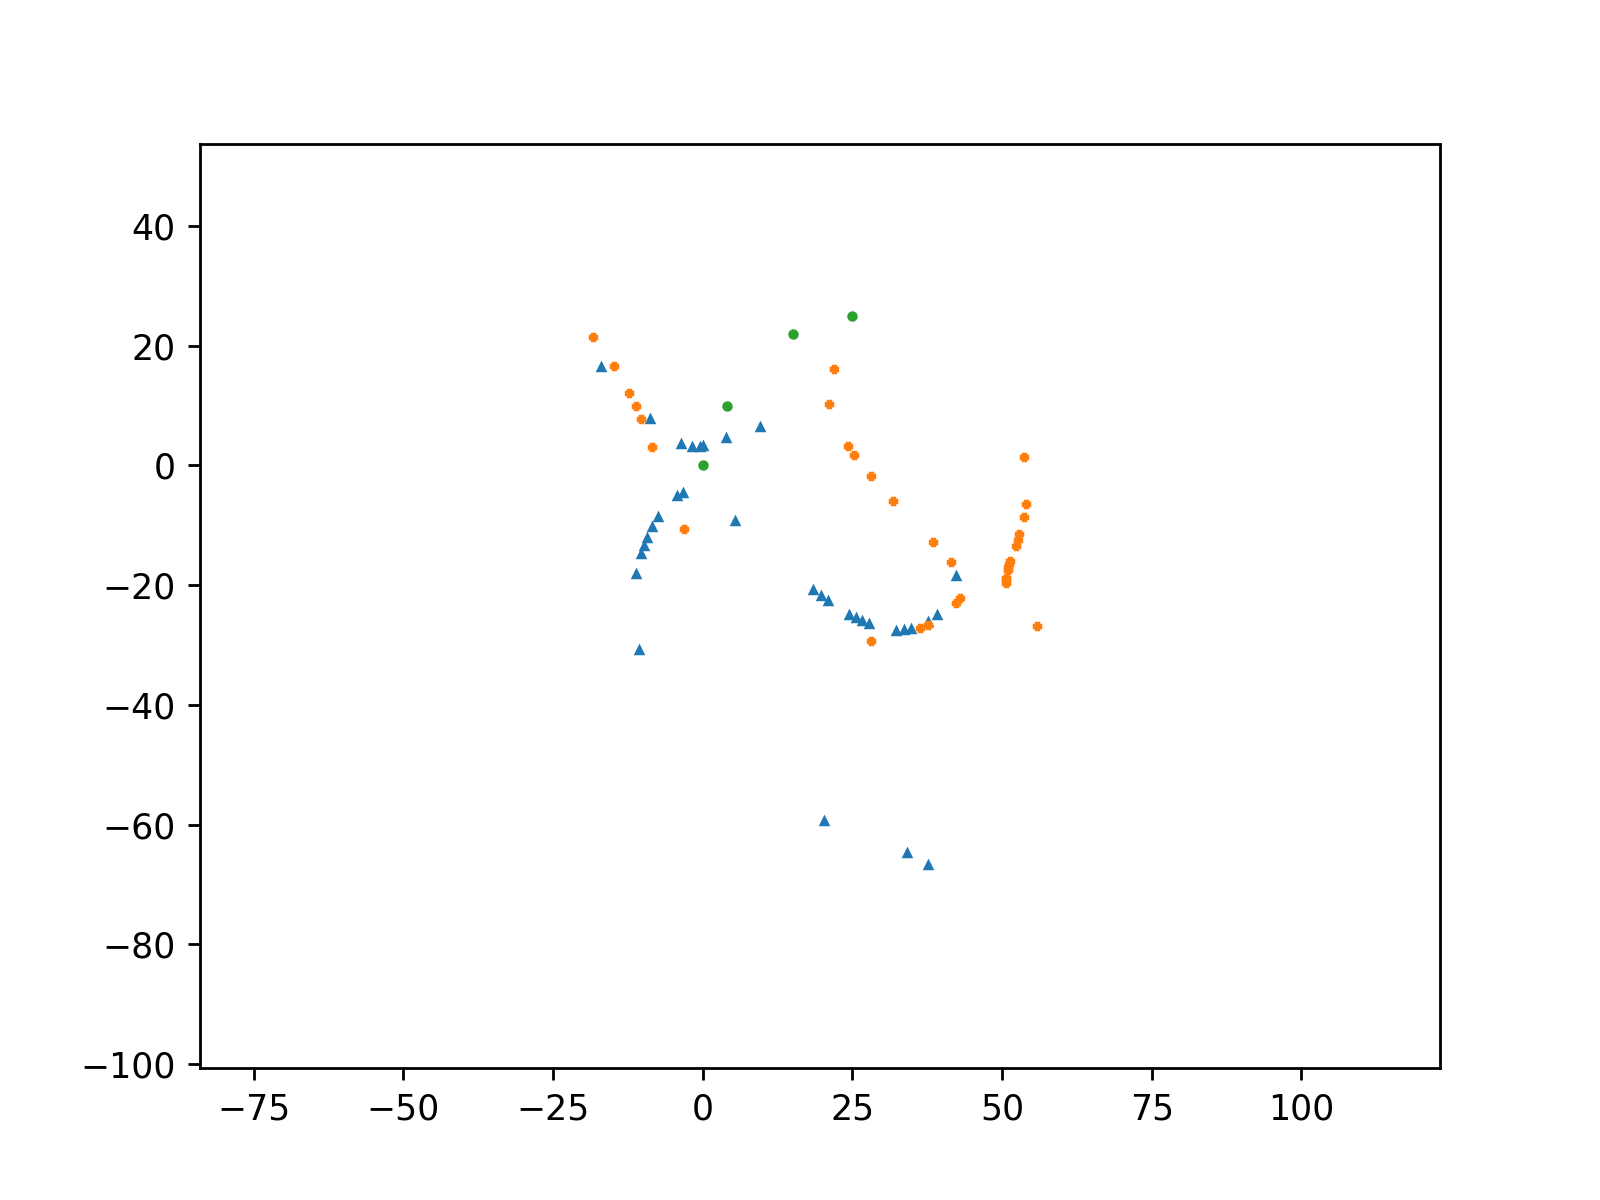

In [1]:
# values from the T.Chase Centerpoint Paper & Myszka Centerpoint Paper
# Code by: M.A.Ganter @ 2020

%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define random angle function
def randang():
   return(2*np.pi*random.random())

# define a problem epsilon (for Nsolve)
EPSILON = 1.0e-6
# define residual epsilon
RES_EPSILON = 1.0e-2

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
#g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

numpoints = 1600
# k = circle-point (or moving pivot)
kRptx = np.zeros(numpoints)
kRpty = np.zeros(numpoints)
kRang = np.zeros(numpoints)

# m = center-point (or ground pivot)
mRptx = np.zeros(numpoints)
mRpty = np.zeros(numpoints)
mRang = np.zeros(numpoints)

# gamma 3 & 4 arrays
psi2 = np.zeros(numpoints)
psi4 = np.zeros(numpoints)

# points from Chase's paper (Verified results 11/2020)
c1 = 0+I*0
c2 = 4+I*10
c3 = 15+I*22
c4 = 25+I*25

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

# points from Chase's paper (Verified results 11/2020)
#p2 = radians(30)
#p3 = radians(60)
#p4 = radians(90)

g2 = radians(41.0)  # from pick off of Circle/Center point curves
g3 = radians(25.2) # ACM solution of left Dyad from Circle/Center point curves
g4 = radians(314.7) # ACM solution of left Dyad from Circle/Center point curves

# LEFT SIDE #
# NO LEFT SIDE SOLUTION #

# RIGHT SIDE #
rightside = Matrix([[(exp(I*s2)-1),(exp(I*g2)-1),del2],[(exp(I*s3)-1),(exp(I*g3)-1),del3],[(exp(I*s4)-1),(exp(I*g4)-1),del4]])
detright = rightside.det()
# print("***",detright)

indexR = 0

# Scale is fraction of angle
SCALE = 1
LOOPEND = 360*SCALE
# we want to sample 0->360 in some whole or fraction of a degree.
# if the computations take too long, you can reduce your sampling by changing the 2 to a 5 or a 10 in the next line
for i in range(1,LOOPEND,5):
    
    # print progress meter
    if (i%100 == 0):  
        print("i=",i)


# RIGHT SIDE # 

    # characteristic polynomial approach angle of choice is s3.
    angle = radians(float(i)/SCALE)

    g2a = g2
    g3a = g3
    g4a = g4

    # s3 is a choice (or given in design specs)
    # characteristic polynomial approach
        
    #check s3 == g3 
    if angle == g3a :
        print("s3 = g3")
        
    detrighta = detright.subs(s3,angle)
    #print('detRA=',detrighta)

    #next solve right characteristic equation for s3 and s4
    ansr = nsolve((re(detrighta),im(detrighta)), (s2, s4), (randang(),randang()), 
            maxsteps=100, tol=EPSILON, verify=false ) 
     
    #compute residual for char. eq.
    res3 = abs(detrighta.evalf(subs={s2:ansr[0],s4:ansr[1]}))
    
    s2b = ansr[0]
    s3b = angle
    s4b = ansr[1]
    
    #print("s2=",degrees(s2b)%360,"s3=",degrees(s3b)%360,"s4=",degrees(s4b)%360)
    
    #write out the dyad-standard equations for right side of linkage 
    posr2 = r3*(exp(I*s2b)-1) + r4*(exp(I*g2a)-1) - del2
    posr3 = r3*(exp(I*s3b)-1) + r4*(exp(I*g3a)-1) - del3
    posr4 = r3*(exp(I*s4b)-1) + r4*(exp(I*g4a)-1) - del4
    
    #print("posr2=",posr2)
    #print("posr3=",posr3)
    #print("posr4=",posr4)

    # now plug in results from left characteristic equation into pos. 2 & pos. 4 dyad equation and solve
    ansr = nsolve((re(posr2),im(posr2),re(posr4),im(posr4)), (d3, t3, d4, t4), 
                  (2,randang(),5,randang()), maxsteps=100, tol=1.0e-3, verify=false)
    
    #compute residuals of pos.2 and pos.4 equations.
    #print("ansr[]=",ansr[0],degrees(ansr[1]),ansr[2],degrees(ansr[3]))
    
    res4 = (abs(posr2.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}))  +
           abs(posr4.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]})))
            
            
    evalr3 = N(r3.evalf(subs={d3:ansr[0],t3:ansr[1]}),3)
    evalr4 = N(r4.evalf(subs={d4:ansr[2],t4:ansr[3]}),3)
    
    #print('res3=',res3,'res4=',res4)
               
    if ((res3 < RES_EPSILON) & (res4 < RES_EPSILON)):   
    
    # circle point curve (B)
        kRptx[indexR]=re(c1-evalr4)
        kRpty[indexR]=im(c1-evalr4)
        kRang[indexR]=angle

    # center point curve (Ob)
        mRptx[indexR]=re(c1-evalr4-evalr3)
        mRpty[indexR]=im(c1-evalr4-evalr3)
        mRang[indexR]=angle
        
    # save psi3 & psi44
        psi2[indexR]=s2b
        psi4[indexR]=s4b
    
        indexR = indexR+1
    
    else:
        #print("EPS3/4 Bounds")
        continue


# bottom of loop

#print out number of solutions whose residuals were with tolerance
print('indexR=',indexR)

# call matplotlib routines for a scatter plot 
# plot of right curves
fig, ax = plt.subplots()
ax.plot(kRptx[:indexR-1], kRpty[:indexR-1],'^', mRptx[:indexR-1], mRpty[:indexR-1],'P',
         [re(c1),re(c2),re(c3),re(c4)],[im(c1),im(c2),im(c3),im(c4)],'o',ms=2)
ax.set_aspect('equal',adjustable='datalim')
plt.show()

 

In [3]:
#You must run the above code first, this cell relies on notebook context.


# Use Zelle graphics to display center-pt/circle-pt curves and allow user to select a center-pt location (orange curve)
# the cursor selection will be found in the table data.  Both the center-pt and circle-pt data will be
# printed and displayed.

# Code by: M.A.Ganter @ 2020

from math import *
from graphics import *
win = GraphWin("Right CirclePT/CenterPT", 400,400)
win.setCoords(-50,-50,50,50)

#plot the path points C1-C4
p = Point(re(c1),im(c1))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c2),im(c2))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c3),im(c3))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)
p = Point(re(c4),im(c4))
p.setFill("green")
p.draw(win)
Circle(p, 1).draw(win)

#plot the circle pt curve
for i in range(1,indexR):
    p = Point(kRptx[i],kRpty[i])
    p.setFill("blue")
    p.draw(win)

#plot the center pt curve
for i in range(1,indexR):
    p = Point(mRptx[i],mRpty[i])
    p.setFill("orange")
    p.draw(win)
    
p = win.getMouse() # get cursor near center pt curve.
xc = p.getX()
yc = p.getY()

# search for pick point in the table data.
min_distance = 1/EPSILON
min_index = -1

for i in range(0,indexR):
    distance = sqrt((xc-mRptx[i])**2+(yc-mRpty[i])**2)
    if (distance < min_distance):
        min_distance = distance
        min_index = i
        
# print out the actual table data and plot the graphics results.
        
#print("CirclePt XY       S3     CenterPt XY   S2     S4")
#print("[%6.2f, % 6.2f] % 6.1f [%6.1f, % 6.1f] % 6.1f % 6.1f" %
#          (kRptx[min_index], kRpty[min_index], degrees(kRang[min_index])%360,mRptx[min_index],
#           mRpty[min_index],degrees(psi2[min_index])%360,degrees(psi4[min_index])%360))

print("CirclePt XY       CenterPt XY   S2     S3     S4")
print("[%6.2f, % 6.2f] [%6.1f, % 6.1f] % 6.1f % 6.1f % 6.1f" %
          (kRptx[min_index], kRpty[min_index], mRptx[min_index],
           mRpty[min_index],degrees(psi2[min_index])%360,degrees(kRang[min_index])%360,degrees(psi4[min_index])%360))

p = Point(mRptx[min_index],mRpty[min_index])
p.setFill("red")   
p.draw(win)
Circle(p, 3).draw(win)

p = Point(kRptx[min_index],kRpty[min_index])
p.setFill("red")
p.draw(win)
Circle(p, 3).draw(win)

win.getMouse()
win.close()

CirclePt XY       CenterPt XY   S2     S3     S4
[ -8.40, -10.23] [ -14.8,   16.6]   30.6   61.0   91.7


In [2]:
# A quick and dirty block of code to print out the table data

# Code by: M.A.Ganter @ 2020

print("CirclePt XY         CenterPt XY       S2     S3     S4")

for i in range(0,indexR):
    print("[%6.2f, % 6.2f] [%6.1f, % 6.1f] % 6.1f % 6.1f % 6.1f" %
          (kRptx[i], kRpty[i], mRptx[i], mRpty[i],degrees(psi2[i])%360,degrees(kRang[i])%360,degrees(psi4[i])%360))
    
#print("ML table")
#for  i in range(1,index):
#    print("% 6.2f, % 6.2f, % 6.1f" % (mLptx[i], mLpty[i], mLang[i]))
    

CirclePt XY         CenterPt XY       S2     S3     S4
[ -4.75,  -5.49] [ -51.2,   52.8]    9.3   21.0   29.2
[ -6.56,  -7.39] [ -23.8,   27.7]   19.0   41.0   59.1
[ 88.81, -117.31] [  42.7,  -22.6]   65.3   51.0  312.5
[ -9.34, -12.21] [ -12.2,   12.2]   37.7   71.0  109.5
[ 48.14, -74.41] [  40.2,  -25.0]   92.8   81.0  307.8
[-11.12, -18.21] [  -8.5,    3.0]   55.9   91.0  150.1
[-11.58, -23.14] [  -6.5,   -2.8]   68.1  101.0  174.5
[ 26.01, -61.38] [  32.0,  -28.6]  116.7  111.0  294.3
[ -1.42, -47.17] [   8.9,  -24.3]  109.0  121.0  251.3
[ 24.37,   6.26] [  32.3,   21.2]  263.9  201.0   85.3
[ 36.17, -26.98] [  53.2,  -10.2]  235.7  211.0  338.8
[ 33.53, -27.58] [  52.6,  -12.5]  244.0  221.0  335.3
[ 10.78,   6.69] [  22.5,   17.0]  299.7  231.0  157.5
[ 28.86, -26.93] [  51.6,  -15.5]  261.9  241.0  330.9
[  4.69,   4.90] [  21.0,   11.3]  320.3  261.0  210.3
[ 19.74, -21.81] [  50.6,  -19.2]  299.3  281.0  326.6
[ -0.52,   3.10] [  25.3,    1.7]  339.7  301.0  269.8
[  7.35, 